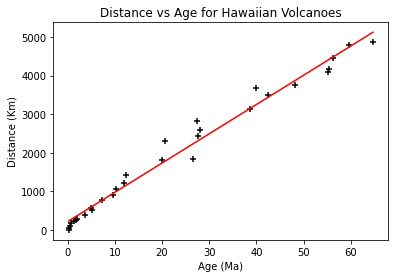

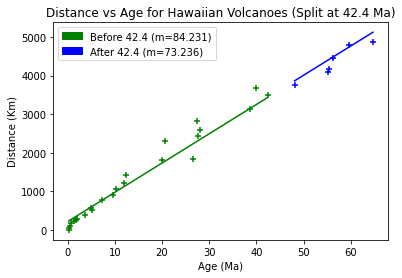

[[84.23053572]]
[[73.23551576]]


,Volcano Number,Volcano Name,Age (Ma),Distance (Km),Age Error (Ma),Distance Error (Km)
0,1,Kilauea,0.20,0,0.20,1.5
1,3,Mauna Kea,0.38,54,0.05,1.8
2,5,Kohala,0.43,100,0.02,2.0
3,6,East Maui,0.75,182,0.04,2.5
4,8,West Maui,1.32,221,0.04,2.7
5,10,East Molokai,1.76,256,0.07,2.9
6,11,West Molokai,1.90,280,0.06,3.0
7,13,Waianae,3.70,374,0.10,3.5
8,14,Kauai,5.10,519,0.20,4.2
9,15,Niihau,4.89,565,0.11,4.5


[[75.82790578]]


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from IPython.display import display
from sklearn.linear_model import LinearRegression


volcanoes = pd.read_csv("volcanoes.csv")

x = volcanoes["Age (Ma)"].to_numpy().reshape(-1, 1)
y = volcanoes["Distance (Km)"].to_numpy().reshape(-1, 1)

reg = LinearRegression().fit(x, y)

x_lbf = [min(x), max(x)]
y_lbf = reg.predict(x_lbf)

plt.scatter(x, y, color="black", marker="+")
plt.plot(x_lbf, y_lbf, color="red")

plt.title("Distance vs Age for Hawaiian Volcanoes")
plt.xlabel("Age (Ma)")
plt.ylabel("Distance (Km)")
plt.show()

bend = 42.4


before = volcanoes[volcanoes["Age (Ma)"] <= bend]
after = volcanoes[volcanoes["Age (Ma)"] > bend]

x_before = before["Age (Ma)"].to_numpy().reshape(-1, 1)
y_before = before["Distance (Km)"].to_numpy().reshape(-1, 1)

reg_before = LinearRegression().fit(x_before, y_before)
x_before_lbf = [min(x_before), max(x_before)]
y_before_lbf = reg.predict(x_before_lbf)

x_after = after["Age (Ma)"].to_numpy().reshape(-1, 1)
y_after = after["Distance (Km)"].to_numpy().reshape(-1, 1)

reg_after = LinearRegression().fit(x_after, y_after)
x_after_lbf = [min(x_after), max(x_after)]
y_after_lbf = reg.predict(x_after_lbf)

plt.scatter(x_before, y_before, color="green", marker="+")
plt.scatter(x_after, y_after, color="blue", marker="+")

plt.plot(x_before_lbf, y_before_lbf, color="green")
plt.plot(x_after_lbf, y_after_lbf, color="blue")

plt.title(f"Distance vs Age for Hawaiian Volcanoes (Split at {bend} Ma)")
plt.xlabel("Age (Ma)")
plt.ylabel("Distance (Km)")

before_patch = mpatches.Patch(color="green", label = f"Before {bend} (m={reg_before.coef_[0][0]:.3f})")
after_patch = mpatches.Patch(color="blue", label = f"After {bend} (m={reg_after.coef_[0][0]:.3f})")
plt.legend(handles=[before_patch, after_patch])
plt.show()

print(reg_before.coef_)
print(reg_after.coef_)

display(volcanoes)

print(reg.coef_)